In [8]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
# X = 100X2, y = 100
X, y = make_regression(n_samples=100, n_features=2, noise=0.1, random_state=1)
# 값의 범위가 다름
scalarX, scalarY = MinMaxScaler(), MinMaxScaler()
scalarX.fit(X)
scalarY.fit(y.reshape(100,1))
X = scalarX.transform(X)
y = scalarY.transform(y.reshape(100,1))
# keras model
model = Sequential()
# 100X2 출력차수 지정 2X4 => 100X4
model.add(Dense(4, input_dim=2, activation='relu'))
# 입력 100X4, 가중치 4X4, 출력 100X4
model.add(Dense(4, activation='relu'))
# 입력 100X4, 가중치 4X1, 출력 100X1
model.add(Dense(1, activation='linear'))
# backend = tensorflow
# mse, cross entropy, KL-divergence : 분포를 비교
model.compile(loss='mse', optimizer='adam')
model.fit(X, y, epochs=1000, verbose=0)
Xnew, ynew = make_regression(n_samples=3, n_features=2, noise=0.1, random_state=1)
Xnew = scalarX.transform(Xnew)
for i in range(len(Xnew)):
    print("입력데이터=%s, 예측결과=%s" % (Xnew[i], ynew[i]))

입력데이터=[0.29466096 0.30317302], 예측결과=-95.68750948023445
입력데이터=[0.39445118 0.79390858], 예측결과=26.204828091429512
입력데이터=[0.02884127 0.6208843 ], 예측결과=-121.28229571474058


In [15]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
numpy.random.seed(7)
dataset = numpy.loadtxt("pima.data", delimiter=",")
X = dataset[:, 0:8]
Y = dataset[:, 8]
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer='uniform',
                activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',
             metrics=['accuracy'])
model.fit(X, Y, epochs=150, batch_size=10)
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10)
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/150
768/768 [==============================] - 0s 435us/step - loss: 0.6723 - accuracy: 0.6081
Epoch 2/150
768/768 [==============================] - 0s 97us/step - loss: 0.6215 - accuracy: 0.6693
Epoch 3/150
768/768 [==============================] - 0s 99us/step - loss: 0.6119 - accuracy: 0.6875
Epoch 4/150
768/768 [==============================] - 0s 97us/step - loss: 0.6085 - accuracy: 0.6745
Epoch 5/150
768/768 [==============================] - 0s 91us/step - loss: 0.6032 - accuracy: 0.6810
Epoch 6/150
768/768 [==============================] - 0s 90us/step - loss: 0.5888 - accuracy: 0.6927
Epoch 7/150
768/768 [==============================] - 0s 94us/step - loss: 0.5884 - accuracy: 0.6888
Epoch 8/150
768/768 [==============================] - 0s 103us/step - loss: 0.5903 - accuracy: 0.6823
Epoch 9/150
768/768 [==============================] - 0s 88us/step - loss: 0.5923 - accuracy: 0.6927
Epoch 10/150
768/768 [==============================] - 0s 99us/step - loss: 0.5

768/768 [==============================] - 0s 95us/step - loss: 0.4934 - accuracy: 0.7643
Epoch 81/150
768/768 [==============================] - 0s 93us/step - loss: 0.4915 - accuracy: 0.7643
Epoch 82/150
768/768 [==============================] - 0s 90us/step - loss: 0.4939 - accuracy: 0.7773
Epoch 83/150
768/768 [==============================] - 0s 99us/step - loss: 0.4917 - accuracy: 0.7656
Epoch 84/150
768/768 [==============================] - 0s 97us/step - loss: 0.4873 - accuracy: 0.7630
Epoch 85/150
768/768 [==============================] - 0s 95us/step - loss: 0.4973 - accuracy: 0.7643
Epoch 86/150
768/768 [==============================] - 0s 83us/step - loss: 0.5017 - accuracy: 0.7383
Epoch 87/150
768/768 [==============================] - 0s 89us/step - loss: 0.4908 - accuracy: 0.7669
Epoch 88/150
768/768 [==============================] - 0s 96us/step - loss: 0.4871 - accuracy: 0.7617
Epoch 89/150
768/768 [==============================] - 0s 93us/step - loss: 0.4925 - 

514/514 [==============================] - 0s 112us/step - loss: 0.4791 - accuracy: 0.7626 - val_loss: 0.4501 - val_accuracy: 0.8031
Epoch 7/150
514/514 [==============================] - 0s 124us/step - loss: 0.4813 - accuracy: 0.7549 - val_loss: 0.4413 - val_accuracy: 0.8071
Epoch 8/150
514/514 [==============================] - 0s 125us/step - loss: 0.4957 - accuracy: 0.7568 - val_loss: 0.4332 - val_accuracy: 0.8071
Epoch 9/150
514/514 [==============================] - 0s 136us/step - loss: 0.4729 - accuracy: 0.7646 - val_loss: 0.4405 - val_accuracy: 0.7992
Epoch 10/150
514/514 [==============================] - 0s 122us/step - loss: 0.4726 - accuracy: 0.7685 - val_loss: 0.4632 - val_accuracy: 0.8189
Epoch 11/150
514/514 [==============================] - 0s 120us/step - loss: 0.4770 - accuracy: 0.7646 - val_loss: 0.4598 - val_accuracy: 0.8110
Epoch 12/150
514/514 [==============================] - 0s 130us/step - loss: 0.4747 - accuracy: 0.7665 - val_loss: 0.4501 - val_accuracy: 0

514/514 [==============================] - 0s 120us/step - loss: 0.4634 - accuracy: 0.7549 - val_loss: 0.4877 - val_accuracy: 0.7795
Epoch 63/150
514/514 [==============================] - 0s 118us/step - loss: 0.4929 - accuracy: 0.7451 - val_loss: 0.4630 - val_accuracy: 0.7874
Epoch 64/150
514/514 [==============================] - 0s 116us/step - loss: 0.4747 - accuracy: 0.7821 - val_loss: 0.4770 - val_accuracy: 0.8031
Epoch 65/150
514/514 [==============================] - 0s 124us/step - loss: 0.4777 - accuracy: 0.7685 - val_loss: 0.4898 - val_accuracy: 0.7598
Epoch 66/150
514/514 [==============================] - 0s 118us/step - loss: 0.4804 - accuracy: 0.7471 - val_loss: 0.4652 - val_accuracy: 0.7835
Epoch 67/150
514/514 [==============================] - 0s 122us/step - loss: 0.4689 - accuracy: 0.7665 - val_loss: 0.4710 - val_accuracy: 0.7795
Epoch 68/150
514/514 [==============================] - 0s 116us/step - loss: 0.4724 - accuracy: 0.7724 - val_loss: 0.4636 - val_accuracy

514/514 [==============================] - 0s 120us/step - loss: 0.4576 - accuracy: 0.7665 - val_loss: 0.4720 - val_accuracy: 0.7835
Epoch 119/150
514/514 [==============================] - 0s 145us/step - loss: 0.4625 - accuracy: 0.7646 - val_loss: 0.4713 - val_accuracy: 0.7874
Epoch 120/150
514/514 [==============================] - 0s 120us/step - loss: 0.4513 - accuracy: 0.7646 - val_loss: 0.4683 - val_accuracy: 0.7874
Epoch 121/150
514/514 [==============================] - 0s 126us/step - loss: 0.4525 - accuracy: 0.7821 - val_loss: 0.4865 - val_accuracy: 0.7717
Epoch 122/150
514/514 [==============================] - 0s 118us/step - loss: 0.4607 - accuracy: 0.7646 - val_loss: 0.4609 - val_accuracy: 0.7874
Epoch 123/150
514/514 [==============================] - 0s 123us/step - loss: 0.4490 - accuracy: 0.7743 - val_loss: 0.4775 - val_accuracy: 0.7717
Epoch 124/150
514/514 [==============================] - 0s 124us/step - loss: 0.4509 - accuracy: 0.7743 - val_loss: 0.4851 - val_ac

In [16]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


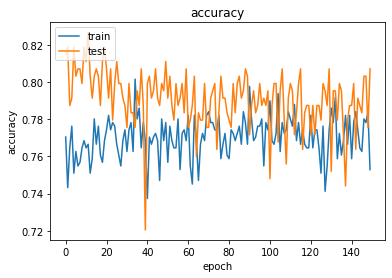

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.show()

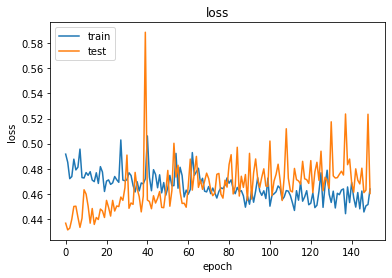

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.show()

[Text(0, 0.5, 'Y'), Text(0.5, 0, 'X'), Text(0.5, 1.0, 'binary classification')]

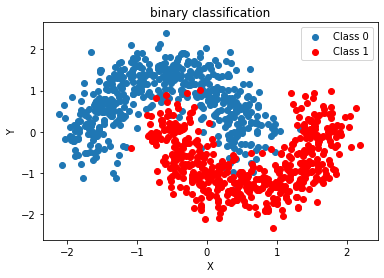

In [22]:
from sklearn.preprocessing import scale
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X, Y = make_moons(noise=0.2, random_state=0, n_samples=1000)
X = scale(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.5)

fig, ax = plt.subplots()
ax.scatter(X[Y==0, 0], X[Y==0, 1], label='Class 0')
ax.scatter(X[Y==1, 0], X[Y==1, 1], color='r', label='Class 1')
ax.legend()
ax.set(xlabel='X', ylabel='Y', title='binary classification')

In [27]:
# 비선형 문제 해결 : 신경망
import keras
model = Sequential()
# 1000X2 => 32로 차원 확대 (2X32) => 1000X32
model.add(Dense(32, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='AdaDelta', loss='binary_crossentropy',
             metrics=['accuracy'])
# 콜백함수 : 자동으로 호출되는 함수
tb_callback = keras.callbacks.TensorBoard(log_dir='./Graph/model_1/',
                                         histogram_freq=100, write_graph=True,
                                         write_images=False)
tb_callback.set_model(model) # 콜백을 모델에 등록

In [29]:
hist = model.fit(X_train, Y_train, batch_size=32, epochs=200,
                 verbose=0, validation_data=(X_test, Y_test),
                 callbacks=[tb_callback])

In [31]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Test loss:  0.12662312227487565
Test accuracy:  0.9480000138282776


In [62]:
keras.utils.print_summary(model)
keras.utils.plot_model(model)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 15)                11775     
_________________________________________________________________
dense_39 (Dense)             (None, 10)                160       
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

In [34]:
%matplotlib inline
from keras.utils.vis_utils import model_to_dot
model_to_dot(model)

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

In [35]:
from IPython.display import Image, SVG
SVG(model_to_dot(model).create(prog='dot', format='svg'))

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

In [66]:
# Callback class
# custom callback 함수의 제작
# 함수에 의해서 호출되는 객체
class CustomHistory(keras.callbacks.Callback):
    def init(self):
        self.train_loss = []
        self.val_loss = []
        self.train_acc = []
        self.val_acc = []
        
    def on_epoch_end(self, batch, logs={}): # 오버라이딩
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))
        self.train_acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))

In [67]:
from keras.datasets import mnist
import matplotlib.pylab as plt
(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()
print(X_train0.shape, X_train0.dtype)
print(y_train0.shape, y_train0.dtype)
print(X_test0.shape, X_test0.dtype)
print(y_test0.shape, y_test0.dtype)

(60000, 28, 28) uint8
(60000,) uint8
(10000, 28, 28) uint8
(10000,) uint8


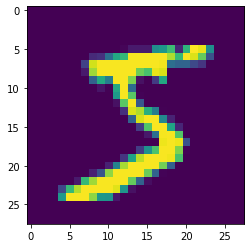

In [68]:
plt.imshow(X_train0[0])
plt.grid(False)
plt.show()

In [69]:
# 이미지 정규화 : 0~255 컬러값 => 0~1
X_train = X_train0.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test0.reshape(10000, 784).astype('float32') / 255.0
print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [70]:
y_train0[:5] # one-hot-encoding 여부
# multi label -> 분류 softmax : 경우의 수에 대한 확률값

array([5, 0, 4, 1, 9], dtype=uint8)

In [71]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train0, 10)
Y_test = np_utils.to_categorical(y_test0, 10)
Y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [72]:
import numpy as np
from keras.optimizers import SGD
np.random.seed(0)
model = Sequential()
model.add(Dense(512, input_dim=784, activation="sigmoid"))
model.add(Dense(15, activation="sigmoid"))
model.add(Dense(10, activation="sigmoid"))
model.compile(optimizer=SGD(lr=0.2), loss='mean_squared_error',
             metrics=['accuracy'])

In [54]:
model.layers

In [73]:
l1 = model.layers[0]
l2 = model.layers[1]

l1.name
l1.input_shape
l1.output_shape
l1.activation

<function keras.activations.sigmoid(x)>

In [74]:
custom_hist = CustomHistory()
custom_hist.init()
hist = model.fit(X_train, Y_train, nb_epoch=30, batch_size=100,
                validation_data=(X_test, Y_test), callbacks=[custom_hist],
                 verbose=2)

C:\Users\ICT01_05\Anaconda3\envs\tf_test\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 1s - loss: 0.1019 - accuracy: 0.2440 - val_loss: 0.0864 - val_accuracy: 0.3212
Epoch 2/30
 - 1s - loss: 0.0845 - accuracy: 0.3921 - val_loss: 0.0821 - val_accuracy: 0.4409
Epoch 3/30
 - 1s - loss: 0.0796 - accuracy: 0.4997 - val_loss: 0.0765 - val_accuracy: 0.5340
Epoch 4/30
 - 1s - loss: 0.0740 - accuracy: 0.5620 - val_loss: 0.0707 - val_accuracy: 0.5852
Epoch 5/30
 - 1s - loss: 0.0682 - accuracy: 0.6149 - val_loss: 0.0649 - val_accuracy: 0.6522
Epoch 6/30
 - 1s - loss: 0.0625 - accuracy: 0.6759 - val_loss: 0.0594 - val_accuracy: 0.6998
Epoch 7/30
 - 1s - loss: 0.0576 - accuracy: 0.7101 - val_loss: 0.0551 - val_accuracy: 0.7316
Epoch 8/30
 - 1s - loss: 0.0537 - accuracy: 0.7325 - val_loss: 0.0516 - val_accuracy: 0.7485
Epoch 9/30
 - 1s - loss: 0.0505 - accuracy: 0.7474 - val_loss: 0.0486 - val_accuracy: 0.7639
Epoch 10/30
 - 1s - loss: 0.0478 - accuracy: 0.7609 - val_loss: 0.0461 - val_accuracy: 0.7759
Epoch 11/30
 - 1s -

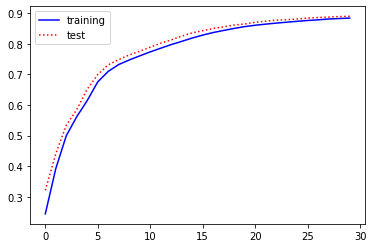

{'batch_size': 100, 'epochs': 30, 'steps': None, 'samples': 60000, 'verbose': 2, 'do_validation': True, 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}
[0.24401666, 0.39213333, 0.49971667, 0.56201667, 0.6149167, 0.6759167, 0.7101333, 0.7325, 0.7474167, 0.76085, 0.77395, 0.7858833, 0.79766667, 0.8082833, 0.81918335, 0.82878333, 0.83713335, 0.84403336, 0.8506333, 0.85646665, 0.8609667, 0.8646167, 0.86795, 0.87091666, 0.87381667, 0.87651664, 0.8786833, 0.88136667, 0.8829, 0.8844]
0.8903999924659729


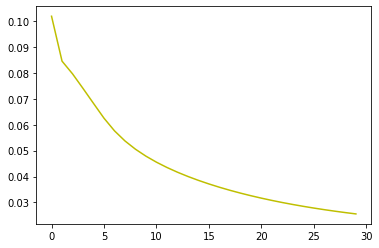

In [77]:
plt.plot(hist.history['accuracy'], 'b-', label="training")
plt.plot(hist.history['val_accuracy'], 'r:', label="test")
plt.legend()
plt.show()
print(hist.params)
print(hist.history['accuracy'])
print(hist.history['val_accuracy'][29])
plt.show()
plt.plot(custom_hist.train_loss, 'y', label="train loss")
plt.show()

In [78]:
# 문제 X_test의 미지 한 장의 label을 예측해보세요
model.predict(X_test[:1, :])
model.predict_classes(X_test[:1, :], verbose=0) # 원핫인코딩을 바꿔줌

array([7], dtype=int64)

In [79]:
from keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

57344/57026 [==============================] - 0s 4us/step


In [83]:
print("shape of x_train", x_train.shape)
print("shape of y_train", y_train.shape)
print(x_test.shape)
print(y_test.shape)

shape of x_train (404, 13)
shape of y_train (404,)
(102, 13)
(102,)


In [85]:
num_features = 13
model = Sequential()
model.add(Dense(1, input_dim=num_features, activation='linear'))
model.summary()
model.compile(optimizer='rmsprop', loss='mse', metrics=["mae"])
model.fit(x_train, y_train, batch_size=1, epochs=10, verbose=1)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 1)                 14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
404/404 [==============================] - 0s 979us/step - loss: 28031.2535 - mae: 127.1642
Epoch 2/10
404/404 [==============================] - 0s 585us/step - loss: 3554.3965 - mae: 46.6836
Epoch 3/10
404/404 [==============================] - 0s 677us/step - loss: 1257.6941 - mae: 27.5113
Epoch 4/10
404/404 [==============================] - 0s 661us/step - loss: 298.5174 - mae: 12.8495
Epoch 5/10
404/404 [==============================] - 0s 664us/step - loss: 140.4095 - mae: 8.7667
Epoch 6/10
404/404 [==============================] - 0s 624us/step - loss: 126.6947 - mae: 8.0275
Epoch 7/10
404/404 [============================

In [86]:
mse, mae = model.evaluate(x_test, y_test, verbose=False)
rmse = np.sqrt(mse)
mse, mae, rmse

(80.5265775194355, 6.593564033508301, 8.973660207486994)

In [116]:
# 문제 : x_test 앞의 3집을 예측하시오
pred = model.predict(x_test[:3,:])
pred = pred.flatten()

(3,)

In [117]:
real = y_test[:3]
real = real.flatten()

In [118]:
import numpy as np
np.corrcoef(pred, real)

array([[1.        , 0.91582434],
       [0.91582434, 1.        ]])

In [132]:
# scikits -- keras를 연결 : KerasClassifier, KerasRegressor
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier

In [122]:
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam',
                 metrics=['accuracy'])
    return model

seed = 7
numpy.random.seed(seed)
dataset = numpy.loadtxt("pima.data", delimiter=",") #원랜 csv인데 없당
X = dataset[:, 0:8]
Y = dataset[:, 8]
model = KerasClassifier(build_fn=create_model, verbose=0)

In [126]:
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid,
                   n_jobs=-1)
grid_result = grid.fit(X, Y)
print("최적스코어: %f   사용한 파라미터조합 : %s" % (grid_result.best_score_,
                                      grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\Users\ICT01_05\Anaconda3\envs\tf_test\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


최적스코어: 0.703183   사용한 파라미터조합 : {'batch_size': 40, 'epochs': 100}
0.605619 (0.075790) with: {'batch_size': 10, 'epochs': 10}
0.681037 (0.023756) with: {'batch_size': 10, 'epochs': 50}
0.667830 (0.057949) with: {'batch_size': 10, 'epochs': 100}
0.615856 (0.021851) with: {'batch_size': 20, 'epochs': 10}
0.677082 (0.021192) with: {'batch_size': 20, 'epochs': 50}
0.683669 (0.038598) with: {'batch_size': 20, 'epochs': 100}
0.506706 (0.084049) with: {'batch_size': 40, 'epochs': 10}
0.665376 (0.016546) with: {'batch_size': 40, 'epochs': 50}
0.703183 (0.030178) with: {'batch_size': 40, 'epochs': 100}
0.572948 (0.041006) with: {'batch_size': 60, 'epochs': 10}
0.664018 (0.032747) with: {'batch_size': 60, 'epochs': 50}
0.673220 (0.024621) with: {'batch_size': 60, 'epochs': 100}
0.525974 (0.030535) with: {'batch_size': 80, 'epochs': 10}
0.631542 (0.058396) with: {'batch_size': 80, 'epochs': 50}
0.665393 (0.028952) with: {'batch_size': 80, 'epochs': 100}
0.475299 (0.057665) with: {'batch_size': 100,

In [ ]:
 가중치 초기화 (kernel_initializer) 매개변수를 넣고
 ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal',
 'glorot_uniform', 'he_normal', 'he_uniform']
 로 테스트해서 가장 최적의 가중치 초기화 파라미터를 결정하시오
 dense1 : activation 함수를 달아주고
 ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid',
 'hardsigmoid', 'linear']
 의 조합 중 가장 좋은 함수를 결정하시오

# 하이퍼 파라미터 튜닝
## keras classifier

In [ ]:
https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

In [133]:
def create_model(init_mode='uniform', activation='relu', dropout_rate=0.1):
    model = Sequential()
    model.add(Dense(12, kernel_initializer='uniform', input_dim=8,  activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer=init_mode, activation=activation))
    model.compile(loss='binary_crossentropy', optimizer='adam',
                 metrics=['accuracy'])
    return model
from keras.callbacks import EarlyStopping
stopper = EarlyStopping(monitor='val_acc', patience=3, verbose=1)

seed = 7
numpy.random.seed(seed)
dataset = numpy.loadtxt("pima.data", delimiter=",")
X = dataset[:, 0:8]
Y = dataset[:, 8]
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=40, verbose=0)
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
init_mode =   ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal',
 'glorot_uniform', 'he_normal', 'he_uniform']
activation = ['softmax', 'softplus']
param_grid =  dict(activation=activation, init_mode=init_mode, dropout_rate=dropout_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
fit_params = dict(callbacks=[stopper])
grid_result = grid.fit(X, Y, **fit_params)

print("최적스코어: %f   사용한 파라미터조합 : %s" % (grid_result.best_score_,
                                      grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\Users\ICT01_05\Anaconda3\envs\tf_test\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


최적스코어: 0.735761   사용한 파라미터조합 : {'activation': 'softplus', 'dropout_rate': 0.0, 'init_mode': 'zero'}
0.348841 (0.052445) with: {'activation': 'softmax', 'dropout_rate': 0.0, 'init_mode': 'uniform'}
0.348841 (0.052445) with: {'activation': 'softmax', 'dropout_rate': 0.0, 'init_mode': 'lecun_uniform'}
0.348841 (0.052445) with: {'activation': 'softmax', 'dropout_rate': 0.0, 'init_mode': 'normal'}
0.348841 (0.052445) with: {'activation': 'softmax', 'dropout_rate': 0.0, 'init_mode': 'zero'}
0.348841 (0.052445) with: {'activation': 'softmax', 'dropout_rate': 0.0, 'init_mode': 'glorot_normal'}
0.348841 (0.052445) with: {'activation': 'softmax', 'dropout_rate': 0.0, 'init_mode': 'glorot_uniform'}
0.348841 (0.052445) with: {'activation': 'softmax', 'dropout_rate': 0.0, 'init_mode': 'he_normal'}
0.348841 (0.052445) with: {'activation': 'softmax', 'dropout_rate': 0.0, 'init_mode': 'he_uniform'}
0.348841 (0.052445) with: {'activation': 'softmax', 'dropout_rate': 0.1, 'init_mode': 'uniform'}
0.34884

In [135]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas

dataframe = pandas.read_csv("housing.csv", delim_whitespace=True, header=None)
dataset = dataframe.values
X = dataset[:, 0:13]
Y = dataset[:, 13]

In [136]:
def baseline_model():
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [137]:
seed = 7
numpy.random.seed(seed)
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=5, verbose=0)

In [139]:
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -138.61 (129.48) MSE


In [141]:
numpy.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mpl', estimator))
pipeline = Pipeline(estimators) # 파이프의 매개변수가 리스트를 요구함
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Standardized : %.2f (%.2f) MSE" % (results.mean(), results.std()))
pipeline.fit(X, Y)

C:\Users\ICT01_05\Anaconda3\envs\tf_test\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Standardized : -567.34 (277.55) MSE


Pipeline(memory=None,
         steps=[('standardize',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mpl',
                 <keras.wrappers.scikit_learn.KerasRegressor object at 0x000002394A705588>)],
         verbose=False)

In [149]:
res = pipeline.predict(X)

import numpy as np
np.corrcoef(res, Y)

array([[1.        , 0.57093233],
       [0.57093233, 1.        ]])

In [152]:
# deep해진 모델
def larger_model():
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer='normal',activation='relu'))
    model.add(Dense(6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [153]:
def wider_model():
    model = Sequential()
    model.add(Dense(20, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [155]:
seed = 7
numpy.random.seed(seed)
estimator1 = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=5, verbose=0)
estimator2 = KerasRegressor(build_fn=larger_model, nb_epoch=100, batch_size=5, verbose=0)
estimator3 = KerasRegressor(build_fn=wider_model, nb_epoch=100, batch_size=5, verbose=0)


In [159]:
# 스케일링 안하면
estimator1.fit(X, Y)
res11 = estimator1.predict(X)

In [160]:
np.corrcoef(res11, Y)

array([[1.        , 0.15574696],
       [0.15574696, 1.        ]])

In [156]:
estimators1 = []
estimators1.append(('standardize', StandardScaler()))
estimators1.append(('mpl', estimator1))

estimators2 = []
estimators2.append(('standardize', StandardScaler()))
estimators2.append(('mpl', estimator2))

estimators3 = []
estimators3.append(('standardize', StandardScaler()))
estimators3.append(('mpl', estimator3))

pipeline1 = Pipeline(estimators1) # 파이프의 매개변수가 리스트를 요구함
pipeline2 = Pipeline(estimators2)
pipeline3 = Pipeline(estimators3)
kfold = KFold(n_splits=10, random_state=seed)
results1 = cross_val_score(pipeline1, X, Y, cv=kfold)
results2 = cross_val_score(pipeline2, X, Y, cv=kfold)
results3 = cross_val_score(pipeline3, X, Y, cv=kfold)

pipeline1.fit(X, Y)
pipeline2.fit(X, Y)
pipeline3.fit(X, Y)

C:\Users\ICT01_05\Anaconda3\envs\tf_test\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Pipeline(memory=None,
         steps=[('standardize',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mpl',
                 <keras.wrappers.scikit_learn.KerasRegressor object at 0x000002397E386A88>)],
         verbose=False)

In [157]:
res1 = pipeline1.predict(X)
res2 = pipeline2.predict(X)
res3 = pipeline3.predict(X)

print(np.corrcoef(res1, Y))
print(np.corrcoef(res2, Y))
print(np.corrcoef(res3, Y))

[[1.         0.24646695]
 [0.24646695 1.        ]]
[[1.         0.23262601]
 [0.23262601 1.        ]]
[[ 1.         -0.36325244]
 [-0.36325244  1.        ]]


# 숙제
- iris.csv 데이터를 로딩한 다음
- 분류망을 구성하시오
- parameter tuning을 구현하시오 (pipeline 사용도 함께)